In [1]:
from skimage import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# %load utils/Chunkerizer
import chunk
import numpy as np

class Chunkizer:
    """Class for chunks generation. Required to fit in model a huge stack
    chunk by chunk.
    """

    def __init__(self, input_shape:tuple, chunk_shape:tuple, batch_size = 1):
        """Is used to disassemble and assemble back input stacks

        Args:
            input_shape (tuple): shape of stack, that must be divided
            chunk_shape (tuple): shape of chunk, that must be generated.
            batch_size (int): number of chunks to be fed in network
            Note, input_shape / chunk_shape, must return int values. Otherwise
            stack is truncated.
        """
        self.input_shape = np.array(input_shape)
        self.chunk_shape = np.array(chunk_shape)
        self.batch_size = batch_size
        self._check_shapes()

    def _check_shapes(self):
        condition_1 = np.any(self.input_shape % self.chunk_shape != 0)
        if condition_1:
            raise ValueError(f'Chunk shape, does not give round chunk number, {self.input_shape = }, {self.chunk_shape = }')

    def divide(self, stack):
        """Method divide. Creates a map of chunks of shape [Y, X, Z, y, x, z]

        Args:
            stack (_type_): _description_
        """
        if stack.shape != tuple(self.input_shape): raise ArithmeticError('Stack shape != input_shape!')
        indices = self.input_shape // self.chunk_shape
        MAP = np.zeros([*indices, *self.chunk_shape])
        I, J, K = self.chunk_shape
        for i in range(indices[0]):
            for j in range(indices[1]):
                for k in range(indices[2]):
                    chunk = stack[
                        i * I : (i + 1) * I,
                        j * J : (j + 1) * J,
                        k * K : (k + 1) * K
                        ]
                    MAP[i,j,k] = chunk

        self.MAP = MAP
        return MAP

    def batch_feed(self, stack):
        MAP = self.divide(stack)

    
    def assemble(self, MAP):
        indices = self.input_shape // self.chunk_shape
        I, J, K = self.chunk_shape
        arr = np.zeros(self.input_shape)
        for i in range(indices[0]):
            for j in range(indices[1]):
                for k in range(indices[2]):
                    arr[
                        i * I : (i + 1) * I,
                        j * J : (j + 1) * J,
                        k * K : (k + 1) * K
                        ] = MAP[i,j,k]

        self.arr = arr
        return arr


class Network:
    def __init__(self) -> None:
        pass

    def forward(self, x):
        return x

# stack = np.zeros([100,100,10])

stack = np.random.random([1000,1000,100])
chunk_shape = [100,100,100]
c = Chunkizer(stack.shape, chunk_shape)
MAP = c.divide(stack)
arr = c.assemble(MAP)
print(np.all(stack == arr))
print(f'{MAP.shape = }')
# for s in stacks:
#     print(s.shape)

True
MAP.shape = (20, 100, 10, 50, 10, 10)


In [ ]:
img = np.load('data/raw/stack_0.npy')
fig = plt.figure(figsize=(20,20))
plt.imshow(img[:,:,50])

In [1]:

def get_max_file_number(path):
    files = os.listdir(path)
    if len(files) == 0:
        return 'there are no files'
    N = int(max(files).split('_')[1].split('.')[0])
    return N

get_max_file_number('data/raw/')


9

In [3]:
class Data_divider:
    def __init__(self):

        
def chunkizer(stack, chunk_number):
    return chunks

'c:\\Users\\sergei\\Documents\\Scripts\\Master-Thesis\\3 Methods, material'

In [4]:
image = np.load('data/raw/stack_0.npy')
print(image.shape)
df = pd.read_csv('data/raw/stack_0.csv', index_col=0)
df

(1000, 1000, 100)


,class,axis-0,axis-1,axis-2
0,Macrophage,754,954,64
1,Macrophage,823,720,25
2,Macrophage,402,693,36
3,Macrophage,123,588,41
4,Macrophage,854,406,48
...,...,...,...,...
369,T_Cell,58,485,64
370,T_Cell,16,617,54
371,T_Cell,54,181,84
372,T_Cell,834,830,21


(1000, 1000, 100)


(400.0, 600.0)

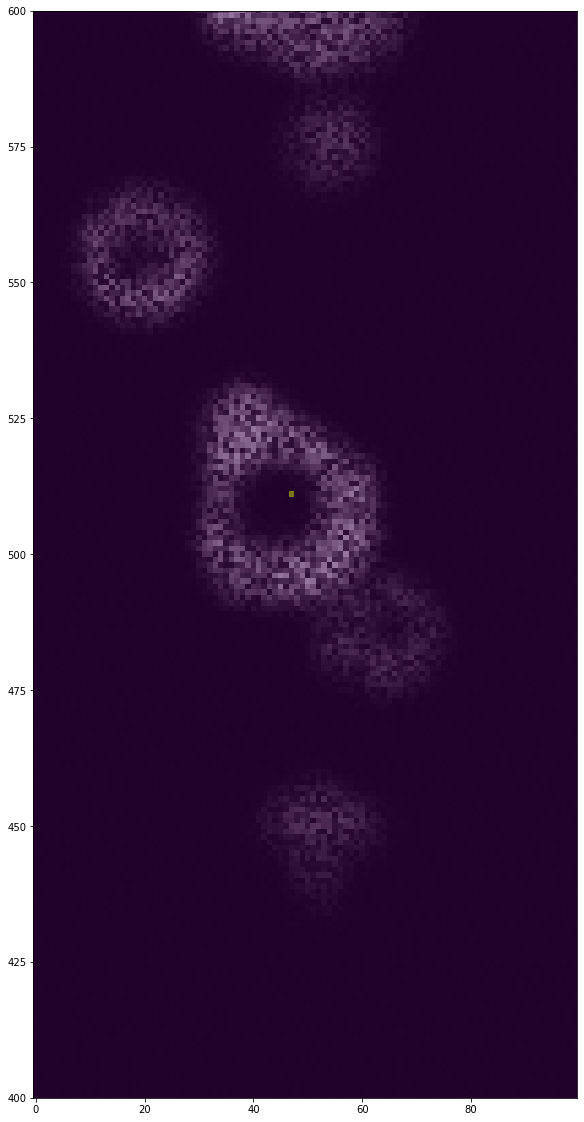

In [14]:
img = np.copy(image)
mask = np.zeros_like(img)
mask[y, x, z] = 1
print(img.shape)
fig = plt.figure(figsize=(20,20))
i = 49
plt.imshow(img[i], cmap='gray')
plt.imshow(mask[i], cmap='viridis', alpha=0.5)
y50 = df[df['axis-0'] == 49]
y =  df['axis-0']
x = y50['axis-1']
z = y50['axis-2']
plt.ylim([400,600])

In [21]:
df['class'].unique()

array(['Macrophage', 'T_Cell'], dtype=object)

In [11]:
a = np.zeros([1,10,10,10])
b = np.copy(a)
np.vstack([a, b]).shape

(2, 10, 10, 10)

In [ ]:
img, mask = dl.__getitem__(0)
z = 48
# mask[mask == 0] = np.nan

fig = plt.figure(figsize=(40,40))
plt.imshow(img[:,:,z], cmap='gray')
plt.imshow(mask[0,:,:,z],cmap='Reds', alpha=0.5)
plt.imshow(mask[1,:,:,z],cmap='Greens', alpha=0.5)
# plt.ylim([400,600])